In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
from scipy.special import rel_entr

In [61]:
# List of available dataset
df18 = pd.read_csv("../exp2-inf/predictions_res18_2.csv")
df50 = pd.read_csv("../exp2-inf/predictions_res50_2.csv")
df101 = pd.read_csv("../exp2-inf/predictions_res101_2.csv")
label = pd.read_csv("../exp2-inf/labels.csv")
prediction = pd.DataFrame({
    "pred18": df18.idxmax(axis=1),
    "pred50": df50.idxmax(axis=1),
    "pred101": df101.idxmax(axis=1),
    "target": label['target']
})
prediction["pred18"] = prediction["pred18"].str.extract('(\d+)').astype(int)
prediction["pred50"] = prediction["pred50"].str.extract('(\d+)').astype(int)
prediction["pred101"] = prediction["pred101"].str.extract('(\d+)').astype(int)

In [62]:
prediction.head()

,pred18,pred50,pred101,target
0,24,24,24,24
1,77,77,77,77
2,252,252,252,252
3,144,144,144,144
4,224,224,224,224


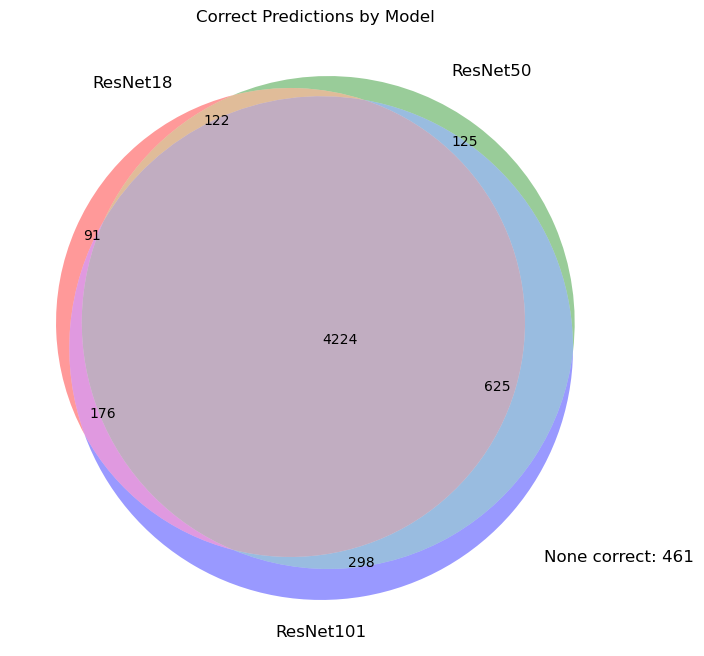

In [63]:
# Accuracy Venn Diagram:
df = prediction
correct_18 = set(df[df['pred18'] == df['target']].index)
correct_50 = set(df[df['pred50'] == df['target']].index)
correct_101 = set(df[df['pred101'] == df['target']].index)
total_indices = set(df.index)
incorrect_all = total_indices - (correct_18 | correct_50 | correct_101)
plt.figure(figsize=(8, 8))
venn_diagram = venn3([correct_18, correct_50, correct_101], ('ResNet18', 'ResNet50', 'ResNet101'))
plt.title('Correct Predictions by Model')
plt.text(0.5, -0.5, f'None correct: {len(incorrect_all)}', fontsize=12)
plt.show()

ou_res18=0.5967268844268535 | ou_res50=0.35323308562895256 | ou_res101=0.15073991393094044


Text(0, 0.5, 'Density')

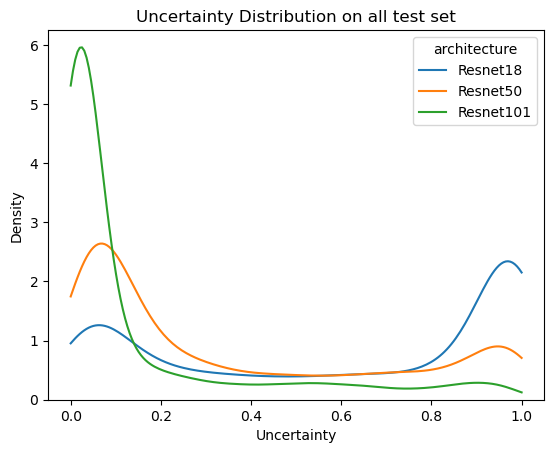

In [64]:
# Uncertainty Visualization
df18["uncertainty"]=1-df18.pow(2).sum(axis=1)
df50["uncertainty"]=1-df50.pow(2).sum(axis=1)
df101["uncertainty"]=1-df101.pow(2).sum(axis=1)
ou_res18 = df18["uncertainty"].mean()
ou_res50 = df50["uncertainty"].mean()
ou_res101 = df101["uncertainty"].mean()
print(f"{ou_res18=} | {ou_res50=} | {ou_res101=}")
sns.kdeplot(df18['uncertainty'], clip=[0, 1], label='Resnet18')
sns.kdeplot(df50['uncertainty'], clip=[0, 1], label='Resnet50')
sns.kdeplot(df101['uncertainty'], clip=[0, 1], label='Resnet101')
plt.legend(title='architecture')
plt.title('Uncertainty Distribution on all test set')
plt.xlabel('Uncertainty')
plt.ylabel('Density')

oc_res18=0.9039513037027024 | oc_res50=0.8942049228363482 | oc_res101=0.9388096569812723


Text(0, 0.5, 'Density')

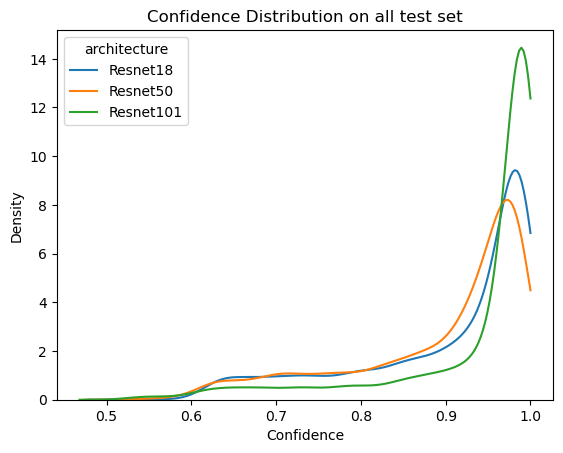

In [65]:
# Confidence Visualization
df18["confidence"]=df18.max(axis=1) # prediction confidence
df50["confidence"]=df50.max(axis=1)
df101["confidence"]=df101.max(axis=1)
oc_res18 = df18["confidence"].mean()
oc_res50 = df50["confidence"].mean()
oc_res101 = df101["confidence"].mean()
print(f"{oc_res18=} | {oc_res50=} | {oc_res101=}")
sns.kdeplot(df18['confidence'], clip=[0, 1], label='Resnet18')
sns.kdeplot(df50['confidence'], clip=[0, 1], label='Resnet50')
sns.kdeplot(df101['confidence'], clip=[0, 1], label='Resnet101')
plt.title('Confidence Distribution on all test set')
plt.legend(title='architecture')
plt.xlabel('Confidence')
plt.ylabel('Density')

/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timothyzhou/anaconda3/envs/cpsc340/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

,pred18,pred50,pred101,target,cor18,cor50,cor101,kl_18_50,kl_18_101,kl_50_18,kl_50_101,kl_101_18,kl_101_50,bin,bin_kl
0,24,24,24,24,1,1,1,-2.252880,0.493671,-0.794514,0.266037,1.310837,0.529287,"(0.437, 2.097]","(1.371, 1.794]"
1,77,77,77,77,1,1,1,-2.036682,-0.935347,-2.658922,-1.269154,-0.414413,-0.348139,"(-1.223, 0.437]","(0.524, 0.947]"


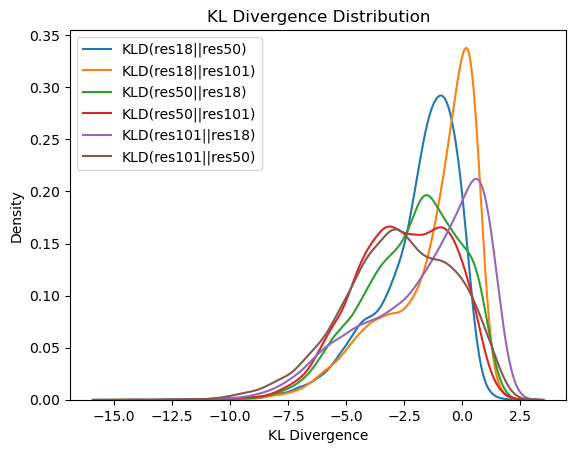

In [130]:
df["cor18"] = np.where(df["pred18"]==df["target"],1,0)
df["cor50"] = np.where(df["pred50"]==df["target"],1,0)
df["cor101"] = np.where(df["pred101"]==df["target"],1,0)
def calc_kl(Q,P,numclass):
    return np.log(rel_entr(Q.iloc[:,0:numclass],P.iloc[:,0:numclass]).sum(1)) # Log
    # return rel_entr(Q.iloc[:,0:numclass],P.iloc[:,0:numclass]).sum(1) # No Log
df["kl_18_50"] = calc_kl(df18,df50,100)
df["kl_18_101"] = calc_kl(df18,df101,100)
df["kl_50_18"] = calc_kl(df50,df18,100)
df["kl_50_101"] = calc_kl(df50,df101,100)
df["kl_101_18"] = calc_kl(df101,df18,100)
df["kl_101_50"] = calc_kl(df101,df50,100)
display(df.head(2))
sns.kdeplot(df["kl_18_50"], label='KLD(res18||res50)')
sns.kdeplot(df["kl_18_101"], label='KLD(res18||res101)')
sns.kdeplot(df["kl_50_18"], label='KLD(res50||res18)')
sns.kdeplot(df["kl_50_101"], label='KLD(res50||res101)')
sns.kdeplot(df["kl_101_18"], label='KLD(res101||res18)')
sns.kdeplot(df["kl_101_50"], label='KLD(res101||res50)')
plt.title('KL Divergence Distribution')
plt.xlabel('KL Divergence')
plt.ylabel('Density')
plt.legend()

In [131]:
binnum=20
def bin_kl_vis(df_in, binnum,kl_name,acc_col1,acc_col2):
    df=df_in
    tempcol = "bin_kl"
    df[tempcol] = pd.cut(df[kl_name].clip(-20,10), bins=binnum)
    print(df[tempcol].value_counts().sort_index())
    grouped = df.groupby(tempcol)[[acc_col1,acc_col2]].mean().reset_index()
    melted_grouped = grouped.melt(id_vars=tempcol, var_name='variable', value_name='value')
    sns.barplot(x=tempcol, y='value', hue='variable', data=melted_grouped)
    plt.xticks(rotation=45)
    plt.xlabel("Log KL Divergence")
    plt.ylabel("Accuracy")
    f = kl_name.split("_")[1]
    s = kl_name.split("_")[2]
    plt.title(f"Accuracy Against log KL(Resnet{f}||Resnet{s})")
    plt.show()

bin_kl
(-11.853, -11.156]       1
(-11.156, -10.473]       1
(-10.473, -9.79]         1
(-9.79, -9.107]          5
(-9.107, -8.423]         5
(-8.423, -7.74]         20
(-7.74, -7.057]         30
(-7.057, -6.374]        49
(-6.374, -5.691]        86
(-5.691, -5.008]       157
(-5.008, -4.325]       245
(-4.325, -3.642]       287
(-3.642, -2.959]       358
(-2.959, -2.276]       508
(-2.276, -1.593]       802
(-1.593, -0.91]       1081
(-0.91, -0.227]       1060
(-0.227, 0.457]        644
(0.457, 1.14]           86
(1.14, 1.823]            8
Name: count, dtype: int64


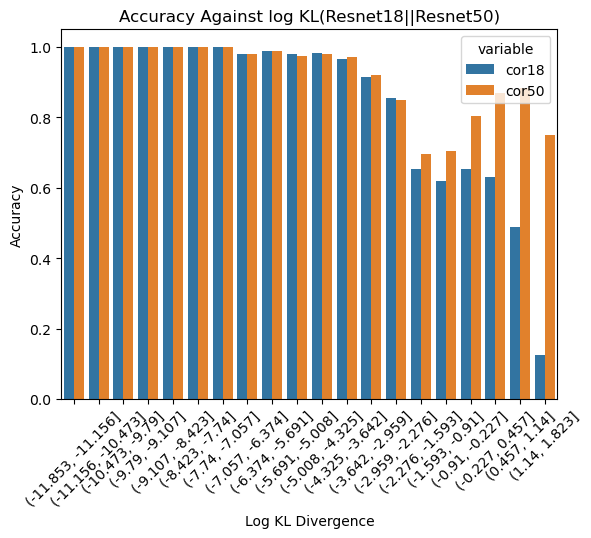

In [132]:
bin_kl_vis(df, binnum, "kl_18_50", "cor18", "cor50")

bin_kl
(-12.153, -11.427]       1
(-11.427, -10.716]       0
(-10.716, -10.005]       1
(-10.005, -9.294]        3
(-9.294, -8.583]         4
(-8.583, -7.872]        17
(-7.872, -7.16]         22
(-7.16, -6.449]         48
(-6.449, -5.738]       111
(-5.738, -5.027]       150
(-5.027, -4.316]       243
(-4.316, -3.605]       307
(-3.605, -2.893]       344
(-2.893, -2.182]       357
(-2.182, -1.471]       453
(-1.471, -0.76]        710
(-0.76, -0.0489]      1160
(-0.0489, 0.662]      1529
(0.662, 1.373]         372
(1.373, 2.085]          20
Name: count, dtype: int64


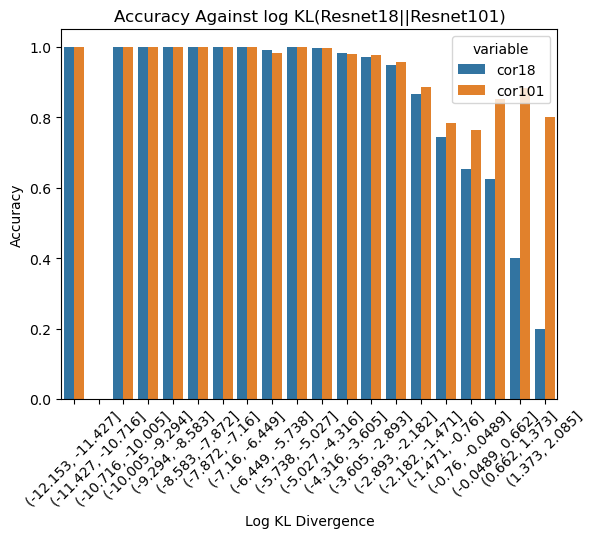

In [133]:
bin_kl_vis(df, binnum, "kl_18_101", "cor18", "cor101")

bin_kl
(-11.592, -10.916]      1
(-10.916, -10.253]      0
(-10.253, -9.59]        2
(-9.59, -8.928]         3
(-8.928, -8.265]        7
(-8.265, -7.602]       17
(-7.602, -6.939]       35
(-6.939, -6.276]       65
(-6.276, -5.613]      123
(-5.613, -4.951]      188
(-4.951, -4.288]      219
(-4.288, -3.625]      302
(-3.625, -2.962]      363
(-2.962, -2.299]      397
(-2.299, -1.636]      508
(-1.636, -0.974]      525
(-0.974, -0.311]      466
(-0.311, 0.352]       381
(0.352, 1.015]        356
(1.015, 1.678]         91
Name: count, dtype: int64


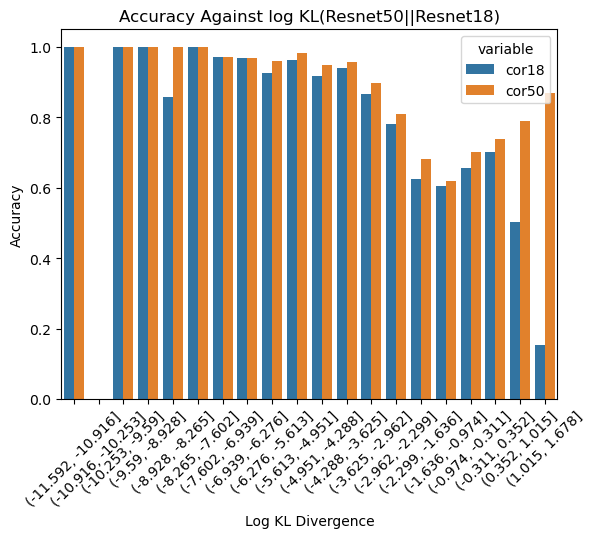

In [134]:
bin_kl_vis(df, binnum, "kl_50_18", "cor18", "cor50")

bin_kl
(-11.164, -10.487]      3
(-10.487, -9.823]       6
(-9.823, -9.159]        4
(-9.159, -8.495]       10
(-8.495, -7.832]       22
(-7.832, -7.168]       48
(-7.168, -6.504]       81
(-6.504, -5.84]       174
(-5.84, -5.176]       271
(-5.176, -4.512]      389
(-4.512, -3.848]      510
(-3.848, -3.184]      604
(-3.184, -2.52]       593
(-2.52, -1.856]       587
(-1.856, -1.192]      573
(-1.192, -0.528]      625
(-0.528, 0.136]       545
(0.136, 0.799]        365
(0.799, 1.463]         99
(1.463, 2.127]         15
Name: count, dtype: int64


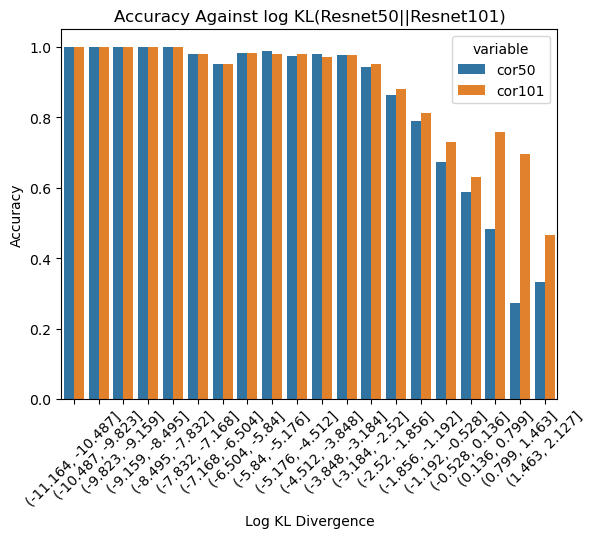

In [135]:
bin_kl_vis(df, binnum, "kl_50_101", "cor50", "cor101")

bin_kl
(-12.774, -12.027]      1
(-12.027, -11.296]      0
(-11.296, -10.564]      1
(-10.564, -9.833]       4
(-9.833, -9.101]        3
(-9.101, -8.369]       14
(-8.369, -7.638]       23
(-7.638, -6.906]       47
(-6.906, -6.175]       77
(-6.175, -5.443]      122
(-5.443, -4.712]      135
(-4.712, -3.98]       159
(-3.98, -3.248]       171
(-3.248, -2.517]      207
(-2.517, -1.785]      218
(-1.785, -1.054]      289
(-1.054, -0.322]      338
(-0.322, 0.409]       399
(0.409, 1.141]        553
(1.141, 1.872]        249
Name: count, dtype: int64


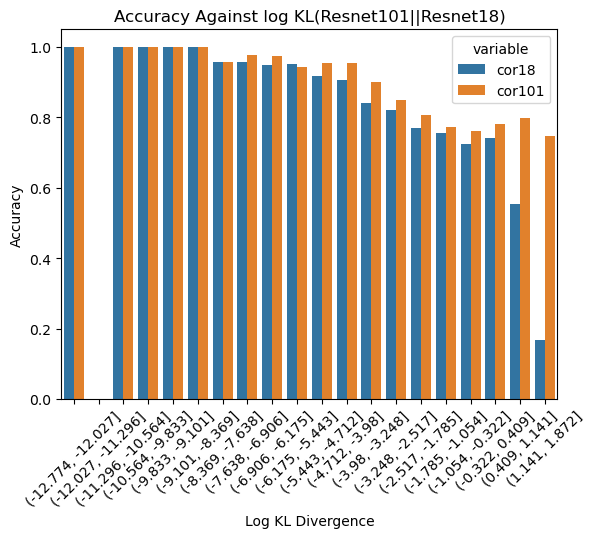

In [136]:
bin_kl_vis(df, binnum, "kl_101_18", "cor18", "cor101")

bin_kl
(-14.52, -13.673]       1
(-13.673, -12.843]      0
(-12.843, -12.013]      0
(-12.013, -11.183]      0
(-11.183, -10.353]      4
(-10.353, -9.523]      10
(-9.523, -8.693]       18
(-8.693, -7.863]       37
(-7.863, -7.033]       55
(-7.033, -6.203]      114
(-6.203, -5.373]      153
(-5.373, -4.543]      249
(-4.543, -3.713]      368
(-3.713, -2.883]      395
(-2.883, -2.053]      407
(-2.053, -1.223]      345
(-1.223, -0.393]      344
(-0.393, 0.437]       298
(0.437, 1.267]        190
(1.267, 2.097]         54
Name: count, dtype: int64


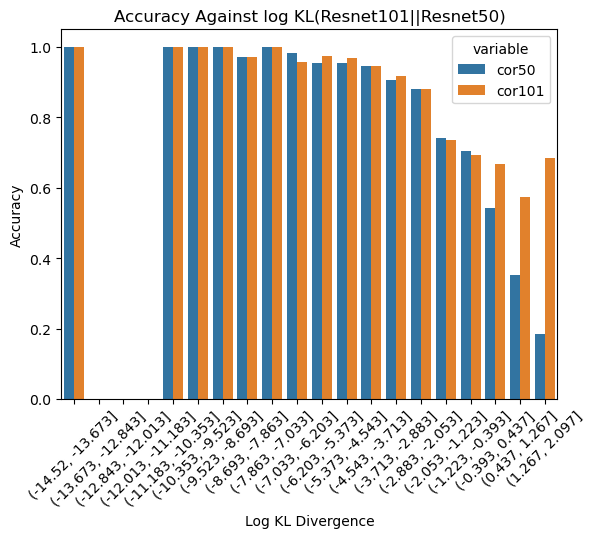

In [137]:
bin_kl_vis(df, binnum, "kl_101_50", "cor50", "cor101")